<h1 align="center">W203 Lab 3: Covid 19</h1>
<h4 align="center">Blake Allen, Sam Shih, Mike Fan</h4>
<h4 align="center">Summer 2020 Section 1 </h4>

# 1. Introduction

The dataset includes (1) variables representing the spread of the disease, (2) variables representing state-level policy responses, and (3) general state-level characteristics.

## Research Question of Interest

# 2. Exploratory Data Analysis (EDA)

## Data Review

In [5]:
getwd()

[1] "C:/Users/micha/Desktop/lab_3-master"

In [101]:
library(plyr)
library(dplyr)
library(ggplot2)
#library(summarytools)
library(coin)
library(effsize)
#library(tidyverse)
library(lsr)
library(corrplot)
#library(rstatix)
library(BSDA)
library(cowplot)
library(ggrepel)
require(stargazer)
library(knitr)
#require(kableExtra)
#require(corrr)
#require(ggcorrplot)
#require(ggfortify)
#require(lmtest)
#install.packages("GGally")
library(GGally)


Loading required package: stargazer

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘stargazer’”


In [83]:
install.packages("latticeExtra")
install.packages("DAAG")
library(DAAG)

Warning message:
“package ‘latticeExtra’ is not available (for R version 3.5.2)”
Warning message:
“dependency ‘latticeExtra’ is not available”
Warning message in install.packages("DAAG"):
“installation of package ‘DAAG’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Warning message in file.create(f.tg):
“cannot create file '/usr/local/Cellar/r/3.5.2_2/lib/R/doc/html/packages.html', reason 'Permission denied'”
Warning message in make.packages.html(.Library):
“cannot update HTML package index”


ERROR: Error in library(DAAG): there is no package called ‘DAAG’


In [126]:
df_covid = read.csv("covid-19_dist0720_enriched.csv")

#head(df_covid)

#combine Arizona & arizona data
for (i in 5:ncol(df_covid)){
    a_val = df_covid[c(3), i]
    b_val = df_covid[c(4), i]
    if (a_val != b_val){
        #print(i)
        #combine when values differ such as Total cases, death, etc. 
         df_covid[c(3), i] = df_covid[c(3), i] + df_covid[c(4), i]
    }
}

#remove extra arizona row
df_covid <- df_covid[-c(4), ]

#redefine 2016 party into bernoulli variable
df_covid$party2016 = ifelse(df_covid$party2016 == "Republican", 1, 0)


names(df_covid)
summary(df_covid)

[1] "party2016"                                                     
 [2] "party2016_votepercent"                                         
 [3] "election_lean"                                                 
 [4] "State"                                                         
 [5] "Total.Cases"                                                   
 [6] "Total.Death"                                                   
 [7] "Death_100k"                                                    
 [8] "CasesInLast7Days"                                              
 [9] "CasesInLast7Days_100k"                                         
[10] "RatePer100000"                                                 
[11] "totalTestResults"                                              
[12] "totalTestResults_100k"                                         
[13] "infection_rate"                                                
[14] "State.of.emergency"                                            
[15] "soe_to_sip"                                                    
[16] "Stay.at.home..shelter.in.place"                                
[17] "sip_binary"                                                    
[18] "sip_start_end"                                                 
[19] "End.relax.stay.at.home.shelter.in.place"                       
[20] "Closed.non.essential.businesses"                               
[21] "soe_biz_close"                                                 
[22] "biz_close_binary"                                              
[23] "biz_close_open"                                                
[24] "Began.to.reopen.businesses.statewide"                          
[25] "Mandate.face.mask.use.by.employees.in.public.facing.businesses"
[26] "soe_face_mask"                                                 
[27] "face_mask_binary"                                              
[28] "unemployment_insurance"                                        
[29] "Population.density.per.square.miles"                           
[30] "Population.2018"                                               
[31] "Percent_under_poverty_line"                                    
[32] "Percent.at.risk.for.serious.illness.due.to.COVID"              
[33] "All.cause.deaths.2018"                                         
[34] "all_death_rate18"                                              
[35] "Children.0.18"                                                 
[36] "Adults.19.25"                                                  
[37] "Adults.26.34"                                                  
[38] "Adults.35.54"                                                  
[39] "Adults.55.64"                                                  
[40] "X65"

   party2016      party2016_votepercent election_lean          State   
 Min.   :0.0000   Min.   :0.4554        Min.   :31.37   Alabama   : 1  
 1st Qu.:0.0000   1st Qu.:0.4979        1st Qu.:42.56   Alaska    : 1  
 Median :1.0000   Median :0.5545        Median :48.72   Arizona   : 1  
 Mean   :0.5882   Mean   :0.5560        Mean   :48.60   Arkansas  : 1  
 3rd Qu.:1.0000   3rd Qu.:0.5979        3rd Qu.:53.45   California: 1  
 Max.   :1.0000   Max.   :0.9048        Max.   :90.48   Colorado  : 1  
                                                        (Other)   :45  
  Total.Cases      Total.Death        Death_100k     CasesInLast7Days
 Min.   :   939   Min.   :   16.0   Min.   :  1.30   Min.   :   51   
 1st Qu.: 11415   1st Qu.:  280.5   1st Qu.:  9.50   1st Qu.:  824   
 Median : 31353   Median :  820.0   Median : 18.00   Median : 3175   
 Mean   : 56416   Mean   : 2542.0   Mean   : 42.32   Mean   : 7463   
 3rd Qu.: 68003   3rd Qu.: 2776.5   3rd Qu.: 46.45   3rd Qu.: 5718   
 Max

## Introduction

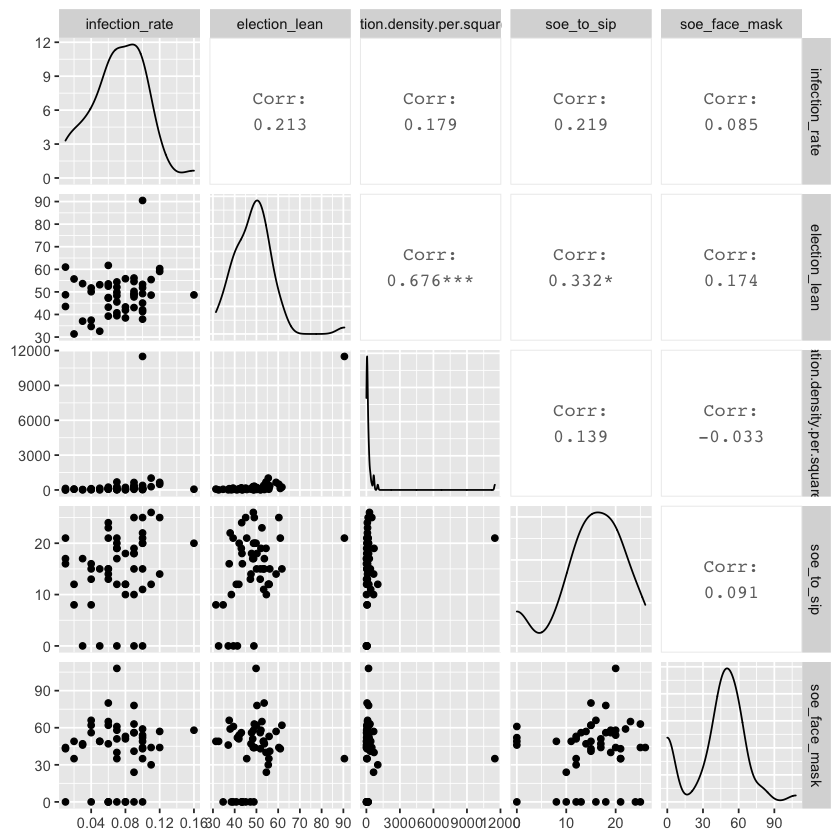

In [128]:
ggpairs(df_covid[,c('infection_rate','election_lean','Population.density.per.square.miles','soe_to_sip', 'soe_face_mask')],cardinality_threshold = 55)


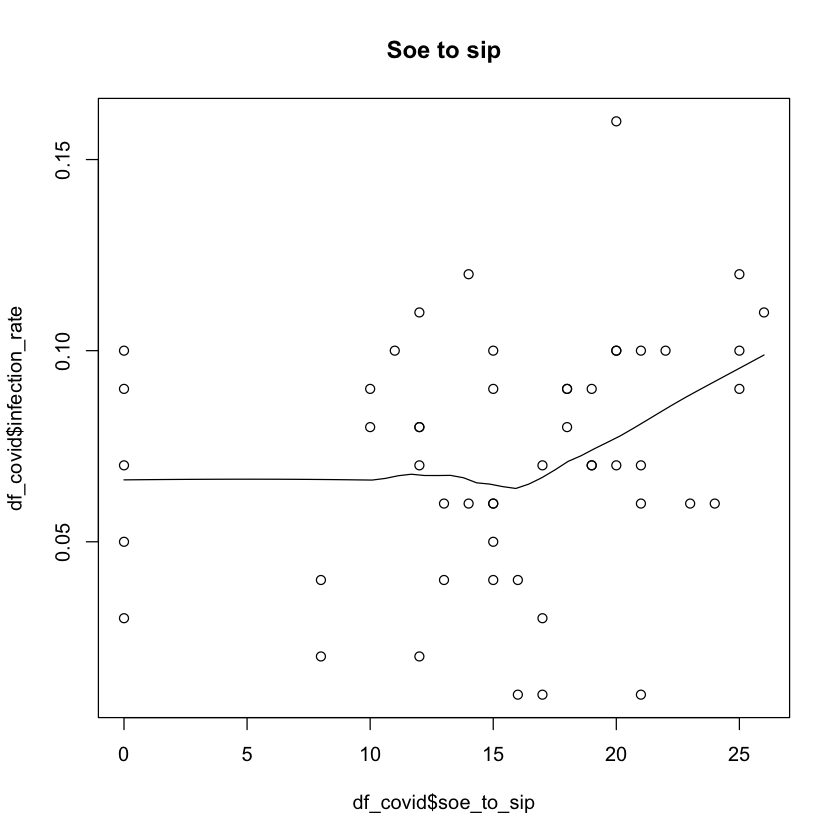

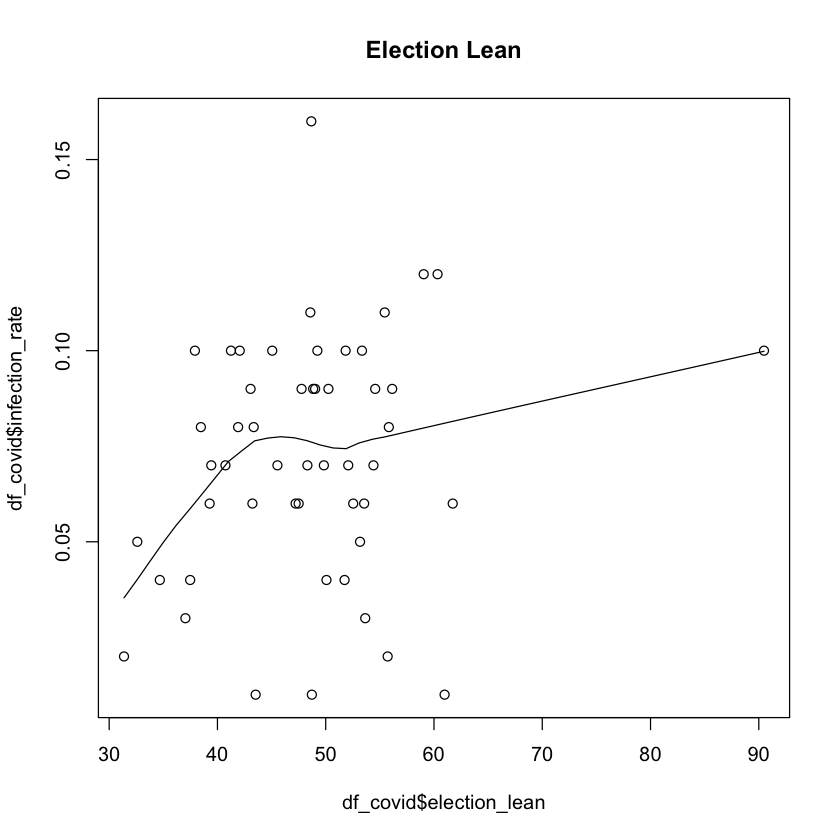

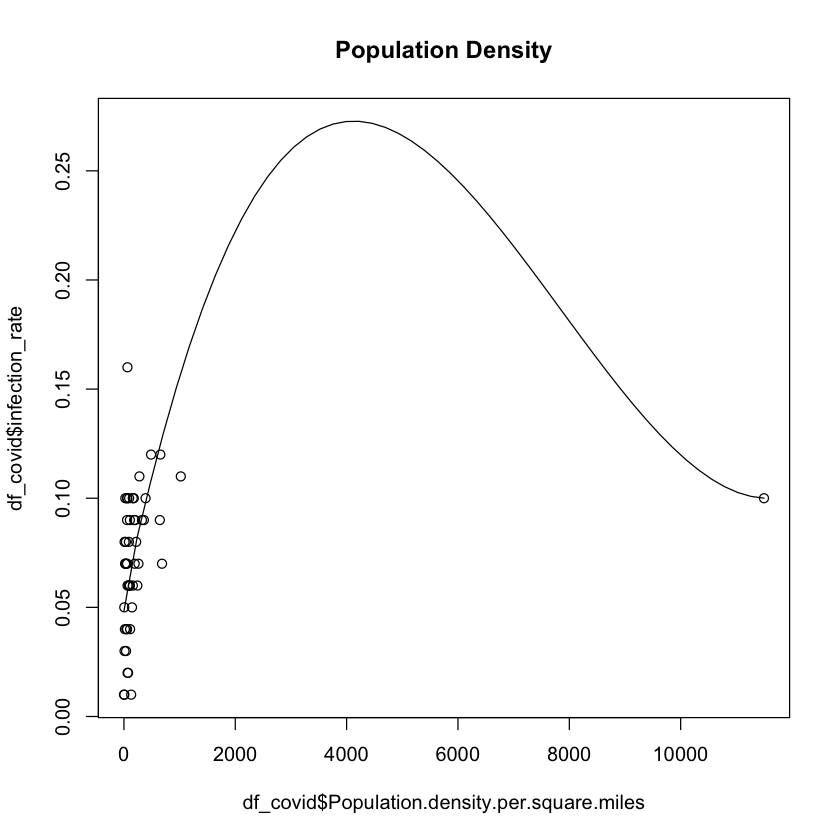

In [133]:
scatter.smooth(x=df_covid$soe_to_sip, y=df_covid$infection_rate, main="Soe to sip")  # scatterplot

scatter.smooth(x=df_covid$election_lean, y=df_covid$infection_rate, main="Election Lean")  # scatterplot

scatter.smooth(x=df_covid$Population.density.per.square.miles, y=df_covid$infection_rate, main="Population Density")  # scatterplot




Call:
lm(formula = infection_rate ~ soe_face_mask + soe_to_sip, data = df_covid)

Coefficients:
  (Intercept)  soe_face_mask     soe_to_sip  
    5.312e-02      8.476e-05      9.999e-04  




Call:
lm(formula = infection_rate ~ soe_face_mask + soe_to_sip, data = df_covid)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.067767 -0.019123  0.004876  0.022089  0.081961 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.312e-02  1.291e-02   4.116 0.000151 ***
soe_face_mask 8.476e-05  1.818e-04   0.466 0.643210    
soe_to_sip    9.999e-04  6.636e-04   1.507 0.138441    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03161 on 48 degrees of freedom
Multiple R-squared:  0.05209,	Adjusted R-squared:  0.01259 
F-statistic: 1.319 on 2 and 48 DF,  p-value: 0.277


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.312472e-02,0.0129082911,4.1155505,0.0001509408
soe_face_mask,8.475629e-05,0.0001818181,0.4661598,0.6432097641
soe_to_sip,9.998993e-04,0.0006636356,1.5066994,0.1384412152


[1] 4.115551

[1] 0.001713577

NULL

value 
0.2769621

# 3. Modeling Process

## Model 1 

For Model one our dependent variable is infection rate as it seems to be the best measure of total effectiveness of covid policies, total cases would be problematic as higher density populations may be misrepresented purely due to more people, thus total cases / population provides a good statistic for our dependent variable. 

### Independent Variable Selection

For independent variables we have chosen

1. **soe_face_mask** how many days after the state of emergency a state mandated face mask.
2. **soe_to_sip** how many days after the state of emergency a state mandated a shelter in place
3. **election_lean** a continuous variable which maps to a states 2016 republican or democratic election leanings
4. **Population.density.per.square.miles** population density per square mile. 

The thought process is that face masks, shelter in place and population density are all good independent variables because they provide a block for transmission (face masks / shelter in place). Population density is a useful variable because it correlates with how close individuals living are and thus how likely they are to infect one another. The final variable chosen, election lean, seems relevant as the covid pandemic has been highly politicized and thus it could be relevant that certain political parties will have an undue effect on the implementation of covid preventative measures. 

### Model Execution and Interpretation

In [137]:
linearMod <- lm(infection_rate ~ soe_face_mask + soe_to_sip + election_lean + Population.density.per.square.miles, data=df_covid)  # build linear regression model on full data
print(linearMod)
summary(linearMod)  # model summary

modelSummary <- summary(linearMod)  # capture model summary as an object
modelCoeffs <- modelSummary$coefficients  # model coefficients
modelCoeffs

beta.estimate <- modelCoeffs["(Intercept)", "Estimate"]  # get beta estimate for infection_rate
std.error <- modelCoeffs["(Intercept)", "Std. Error"]  # get std.error for infection_rate
t_value <- beta.estimate/std.error  # calc t statistic
p_value <- 2*pt(-abs(t_value), df=nrow(cars)-ncol(df_covid))  # calc p Value
f_statistic <- linearMod$fstatistic[1]  # fstatistic
f <- summary(linearMod)$fstatistic  # parameters for model p-value calc
model_p <- pf(f[1], f[2], f[3], lower=FALSE)
#t_value
#p_value
#f_statistic
#model_p


Call:
lm(formula = infection_rate ~ soe_face_mask + soe_to_sip + election_lean + 
    Population.density.per.square.miles, data = df_covid)

Coefficients:
                        (Intercept)                        soe_face_mask  
                          4.353e-02                            7.758e-05  
                         soe_to_sip                        election_lean  
                          8.193e-04                            2.430e-04  
Population.density.per.square.miles  
                          2.139e-06  




Call:
lm(formula = infection_rate ~ soe_face_mask + soe_to_sip + election_lean + 
    Population.density.per.square.miles, data = df_covid)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.069173 -0.017395 -0.003717  0.023047  0.083618 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)
(Intercept)                         4.353e-02  3.072e-02   1.417    0.163
soe_face_mask                       7.758e-05  1.894e-04   0.410    0.684
soe_to_sip                          8.193e-04  7.113e-04   1.152    0.255
election_lean                       2.430e-04  7.054e-04   0.344    0.732
Population.density.per.square.miles 2.139e-06  3.936e-06   0.543    0.589

Residual standard error: 0.03185 on 46 degrees of freedom
Multiple R-squared:  0.07787,	Adjusted R-squared:  -0.002317 
F-statistic: 0.9711 on 4 and 46 DF,  p-value: 0.4325


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.353477e-02,3.071684e-02,1.4172929,0.1631353
soe_face_mask,7.758171e-05,1.893672e-04,0.4096892,0.6839356
soe_to_sip,8.193336e-04,7.112567e-04,1.1519519,0.2552928
election_lean,2.429951e-04,7.053953e-04,0.3444807,0.7320548
Population.density.per.square.miles,2.139292e-06,3.936340e-06,0.5434723,0.5894289


Here we can see the results from our model. Our coefficients seems to have fairly low standard error. 

### Model Diagnostics



## Model 2

### Independent Variable Selection

### Model Execution and Interpretation

### Model Diagnostics

## Model 3

### Independent Variable Selection

### Model Execution and Interpretation

### Model Diagnostics

# 4. Assessment of the CLM Assumptions

## MLR.1: Linearity in Parameters

## MLR.2: Random Sampling

## MLR.3: No Perfect Collinearity

## MLR.4: Zero Conditional Mean

## MLR.5: Homoskedasticity

## MLR.6: Normality of Errors

# 5. Regression Table

## Model Comparison Summary

# 6. Omitted Variables Discussion

# 7. Conclusion